<a href="https://colab.research.google.com/github/saxonmahar/Data_Science/blob/main/svms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only first two features for visualization
y = iris.target

In [3]:
y = (y == 0).astype(int)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [6]:
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)


SVC()

In [7]:
y_pred_linear = svm_linear.predict(X_test)
y_pred_rbf = svm_rbf.predict(X_test)

In [8]:
print("Linear Kernel SVM:\n", classification_report(y_test, y_pred_linear))
print("RBF Kernel SVM:\n", classification_report(y_test, y_pred_rbf))

Linear Kernel SVM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

RBF Kernel SVM:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        26
           1       1.00      1.00      1.00        19

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [9]:
def plot_decision_boundary(model, X, y, title):
    h = .02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

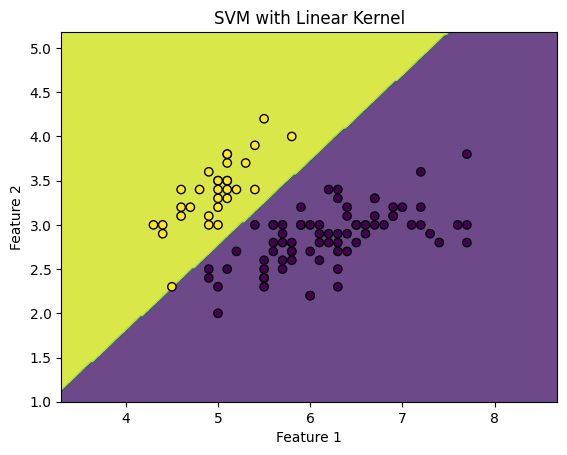

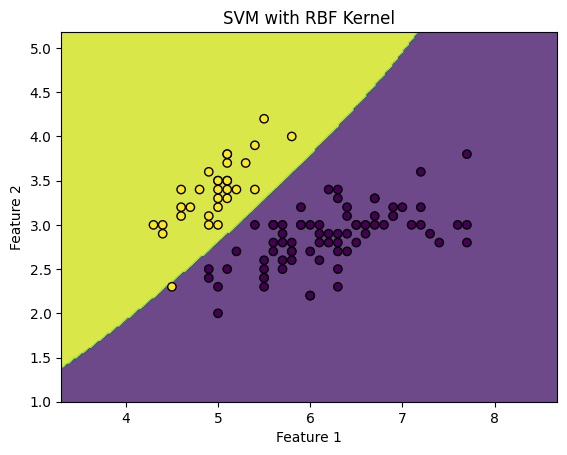

In [10]:
plot_decision_boundary(svm_linear, X_train, y_train, "SVM with Linear Kernel")
plot_decision_boundary(svm_rbf, X_train, y_train, "SVM with RBF Kernel")